In [56]:
import pandas as pd
import re
import textblob
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.stem import PorterStemmer
import re
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import webtext
from nltk.probability import FreqDist
import string
from textblob import Word
from nltk.util import ngrams
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from textblob import Word

# TEXT and how to lower text or change it to data frame

In [ ]:
text=['This is introduction to NLP','It is likely to be useful,to people ','Machine learning is the new electrcity','Therewould be less hype around AI and more action goingforward','python is the best tool!','R is good langauage','Ilike this book','I want more books like this']

In [57]:
data = pd.DataFrame({'text':text})

In [58]:
print(data)

                                                text
0                        This is introduction to NLP
1               It is likely to be useful,to people 
2             Machine learning is the new electrcity
3  Therewould be less hype around AI and more act...
4                           python is the best tool!
5                                R is good langauage
6                                    Ilike this book
7                        I want more books like this


In [7]:
x = 'Testing'
x2 = x.lower()

In [8]:
print(x2)

testing


In [9]:
data['text'] = data['text'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [10]:
data['text']

0                          this is introduction to nlp
1                  it is likely to be useful,to people
2               machine learning is the new electrcity
3    therewould be less hype around ai and more act...
4                             python is the best tool!
5                                  r is good langauage
6                                      ilike this book
7                          i want more books like this
Name: text, dtype: object

# removing any stopwords for chatsbots or searchengines so that they do not search any extra things 

In [11]:
text

['This is introduction to NLP',
 'It is likely to be useful,to people ',
 'Machine learning is the new electrcity',
 'Therewould be less hype around AI and more action goingforward',
 'python is the best tool!',
 'R is good langauage',
 'Ilike this book',
 'I want more books like this']

In [12]:
data

,text
0,this is introduction to nlp
1,"it is likely to be useful,to people"
2,machine learning is the new electrcity
3,therewould be less hype around ai and more act...
4,python is the best tool!
5,r is good langauage
6,ilike this book
7,i want more books like this


In [22]:
data['text'] = data['text'].apply(lambda x:(" ".join(x.lower() for x in x.split() if x not in stop)))

In [23]:
data['text']

0                                     introduction nlp
1                              likely useful,to people
2                      machine learning new electrcity
3    therewould less hype around ai action goingfor...
4                                    python best tool!
5                                     r good langauage
6                                           ilike book
7                                      want books like
Name: text, dtype: object

# standardizing text

In [24]:
lookup_dict = {'nlp':'natural language processing','ur':'your', "wbu" : "what about you"}

In [41]:
def text_data(text_line):
    words = text_line.split()
    words_l = []
    for word in words:
        word = re.sub(r'[^\w\s]',"",word)
        if word.lower() in lookup_dict:
            word = lookup_dict[word.lower()]
            words_l.append(word)
            words_l = " ".join(words_l)
    return words_l

In [45]:
text_data("hello ur nlp")

AttributeError: 'str' object has no attribute 'append'

# Making spellings correct using textblob library

In [59]:
data['text'].apply(lambda x: str(TextBlob(x).correct()))

0                           His is introduction to NLP
1                 It is likely to be useful,to people 
2              Machine learning is the new electricity
3    Therewould be less hope around of and more act...
4                             patron is the best tool!
5                                   R is good language
6                                       Like this book
7                          I want more books like this
Name: text, dtype: object

In [51]:
data['text']

0    (i,  , n,  , t,  , r,  , o,  , d,  , u,  , c, ...
1    (l,  , i,  , k,  , e,  , l,  , y,  ,  ,  , u, ...
2    (m,  , a,  , c,  , h,  , i,  , n,  , e,  ,  , ...
3    (t,  , h,  , e,  , r,  , e,  , w,  , o,  , u, ...
4    (p,  , a,  , t,  , r,  , o,  , n,  ,  ,  , b, ...
5    (r,  ,  ,  , g,  , o,  , o,  , d,  ,  ,  , l, ...
6    (l,  , i,  , k,  , e,  ,  ,  , b,  , o,  , o, ...
7    (w,  , a,  , n,  , t,  ,  ,  , b,  , o,  , o, ...
Name: text, dtype: object

# Tokenizing text

In [60]:
TextBlob(data['text'][3]).words

WordList(['Therewould', 'be', 'less', 'hype', 'around', 'AI', 'and', 'more', 'action', 'goingforward'])

In [61]:
mystring = "My favorite animal is cat"

In [62]:
nltk.word_tokenize(mystring)

['My', 'favorite', 'animal', 'is', 'cat']

In [63]:
mystring.split()

['My', 'favorite', 'animal', 'is', 'cat']

# Stemming

In [72]:
text=['I like fishing','I eat fish','There are many fishes in pound']

In [73]:
df = pd.DataFrame({'text':text})

In [74]:
df

,text
0,I like fishing
1,I eat fish
2,There are many fishes in pound


In [68]:
st = PorterStemmer()

In [75]:
df['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                     I like fish
1                      I eat fish
2    there are mani fish in pound
Name: text, dtype: object

# lemmatizing

In [77]:
df['text'] = df['text'].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))

In [78]:
df['text']

0                  I like fishing
1                      I eat fish
2    There are many fish in pound
Name: text, dtype: object

# EXPLORING TEXT DATA

In [83]:
wt_sentences = webtext.sents('firefox.txt')

In [89]:
wt_words = webtext.words('firefox.txt')

In [87]:
len(wt_sentences)

1142

In [90]:
len(wt_words)

102457

In [99]:
freq_dist = FreqDist(wt_words)
freq_dist.keys()

dict_keys(['Cookie', 'Manager', ':', '"', 'Don', "'", 't', 'allow', 'sites', 'that', 'set', 'removed', 'cookies', 'to', 'future', 'should', 'stay', 'checked', 'When', 'in', 'full', 'screen', 'mode', 'Pressing', 'Ctrl', '-', 'N', 'open', 'a', 'new', 'browser', 'when', 'only', 'download', 'dialog', 'is', 'left', 'add', 'icons', 'context', 'menu', 'So', 'called', 'tab', 'bar', 'be', 'made', 'proper', 'toolbar', 'or', 'given', 'the', 'ability', 'collapse', '/', 'expand', '.', '[', 'XUL', ']', 'Implement', 'Cocoa', 'style', 'customization', '#', 'ifdefs', 'for', 'MOZ_PHOENIX', 'customize', 's', 'has', 'small', 'not', 'nightly', 'builds', 'and', 'tinderboxen', 'Phoenix', 'finish', 'tearing', 'prefs', 'UI', 'pieces', 'then', 'make', 'it', 'suck', 'mozbrowser', 'script', 'doesn', 'start', 'correct', 'binary', 'Need', 'bookmark', 'groups', 'icon', 'Dropping', 'at', 'top', 'of', 'palette', 'box', 'horks', 'things', 'keyboard', 'shortcut', 'Increase', 'Text', 'Size', 'broken', 'default', 'phoenix

In [101]:
sorted_frequency_dist =sorted(freq_dist,key=freq_dist.__getitem__, reverse=True)
sorted_frequency_dist

['.',
 'in',
 'to',
 '"',
 'the',
 "'",
 'not',
 '-',
 'when',
 'on',
 'a',
 'is',
 't',
 'and',
 'of',
 '(',
 'page',
 'for',
 'with',
 ')',
 'window',
 'Firefox',
 'does',
 'from',
 'open',
 ':',
 'menu',
 'should',
 'bar',
 'tab',
 'doesn',
 'after',
 'Firebird',
 'new',
 'work',
 'browser',
 'if',
 'be',
 '0',
 'toolbar',
 'button',
 'bookmarks',
 'dialog',
 'bookmark',
 'as',
 'file',
 'URL',
 'download',
 'crashes',
 'I',
 'no',
 'text',
 'are',
 'or',
 'up',
 'crash',
 'click',
 'tabs',
 'Bookmarks',
 'link',
 '/',
 'firefox',
 'manager',
 '+',
 'using',
 'it',
 'Mozilla',
 'default',
 'error',
 'all',
 'an',
 'clicking',
 's',
 'windows',
 'search',
 'folder',
 ']',
 'Phoenix',
 '1',
 'at',
 'icon',
 'Manager',
 'by',
 'this',
 'site',
 'can',
 'files',
 'Page',
 'fails',
 'causes',
 'use',
 'close',
 '[',
 'opening',
 'Toolbar',
 'Add',
 'has',
 'Bookmark',
 'right',
 'display',
 'down',
 'that',
 'theme',
 'box',
 'Download',
 '9',
 'The',
 'pages',
 'firebird',
 'only',
 'ur

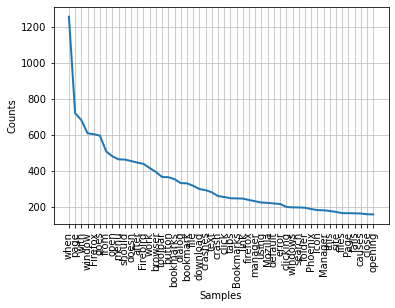

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [104]:
large_words = dict([(k,v) for k,v in freq_dist.items() if len(k)>3])
freq_dist = nltk.FreqDist(large_words)
freq_dist.plot(50,cumulative=False)

# Worldcloud

In [120]:
wcloud = WordCloud().generate_from_frequencies(freq_dist)

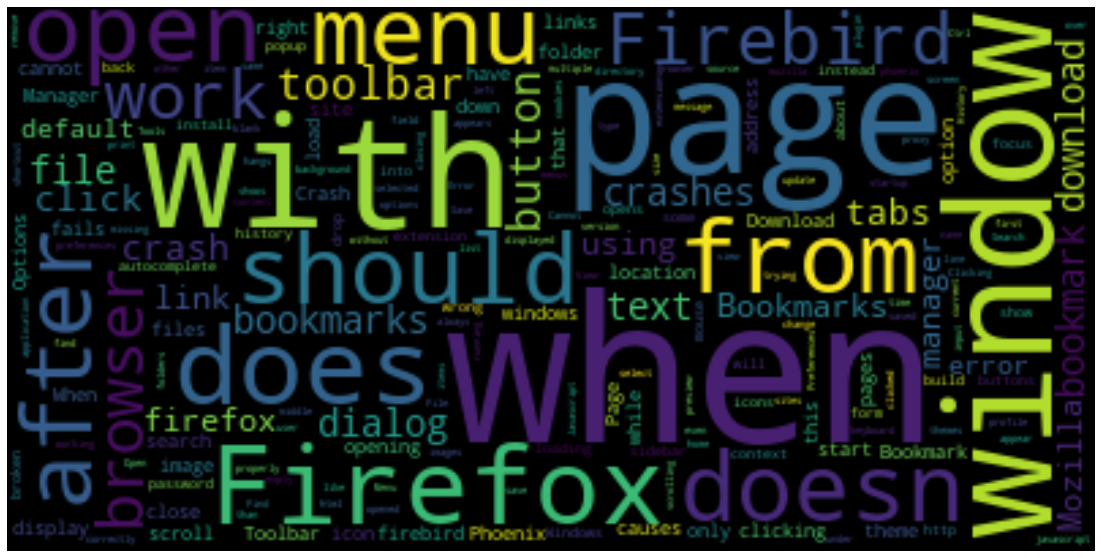

In [121]:
plt.figure(figsize=(20,10))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# BUILDING A TEXT PROCESSING PIPELINE

In [173]:
tweet_sample= "How to take control of your #debt https://personal.vanguard.com/us/insights/saving-investing/debt-management.#Best advice for #family #financial #success (@PrepareToWin)"

In [177]:
def processRow(row):
    tweet = row

    tweet.lower()
    #Removes unicode strings like "\u002c" and "x96"
    tweet = re.sub(r'(\\u[0-9A-Fa-f]+)',r"", tweet)
    tweet = re.sub(r'[^\x00-\x7f]',r"",tweet)
    #convert any url to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert any @Username to "AT_USER"
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('[\n]+', ' ', tweet)
    #Remove not alphanumeric symbols white spaces
    tweet = re.sub(r'[^\w]', ' ', tweet)
    #Removes hastag in front of a word """
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #Remove :( or :)
    tweet = tweet.replace(':)',"")
    tweet = tweet.replace(':(',"")
    #remove numbers
    tweet = " ".join([i for i in tweet if not i.isdigit()])
    #remove multiple exclamation
    tweet = re.sub(r"(\!)\1+", ' ', tweet)
    #remove multiple question marks
    tweet = re.sub(r"(\?)\1+", ' ', tweet)
    #remove multistop
    tweet = re.sub(r"(\.)\1+", ' ', tweet)
    
    tweet ="".join([Word(word).lemmatize() for word in tweet.split()])
    #stemmer
    #st = PorterStemmer()
    #tweet=" ".join([st.stem(word) for word in tweet.split()])
    #Removes emoticons from text
    tweet = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', "", tweet)
    #trim
    #tweet = tweet.strip('\'"')
    row = tweet
    
    return row

In [178]:
processRow(tweet_sample)

'HowtotakecontrolofyourdebtURLadviceforfamilyfinancialsuccessAT_USER'